In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline

In [2]:
# Simply read in the data
column_names = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error','fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension']

# Note: Might need to change this path to the data
df = pd.read_csv("../data/wdbc.data", names=column_names, header=None)

In [3]:
# Show it just to be safe
df.head(3)

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
# Does exactly what it looks like
df["diagnosis"].replace("B", "Benign", inplace=True)
df["diagnosis"].replace("M", "Malignant", inplace=True)

df.head(3)

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,Malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
# Creates two df's one with just the features, and one with all the labes (correct values) that we associate it with

feature_df = df.iloc[:, 2:]
label_df = df.iloc[:, 1]

In [6]:
# Scales all the columns togeather,  so they're within the same range
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(feature_df)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
# Double check
np.mean(x), np.std(x)

(1.2487570048507913e-18, 1.0)

In [8]:
# Now we can use PCA
from sklearn.decomposition import PCA

# n components = 2 because we want to plot it in 2d. 
pca = PCA(n_components=2) # Just creates an instance of a PCA
pca_data = pca.fit_transform(x) # Adds the data
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"]) # creates a df with that data

In [9]:
# This show how much of the variance is explained by each principal component (sp?)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19      True
20      True
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539     True
540     True
541     True
542     True
543     True
544     True
545     True
546     True
547     True
548     True
549     True
550     True
551     True
552     True
553     True
554     True
555     True
556     True
557     True
558     True
559     True
560     True
561     True
562    False
563    False
564    False
565    False
566    False
567    False
568     True
Name: diagnosis, Length: 569, dtype: bool
0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      T

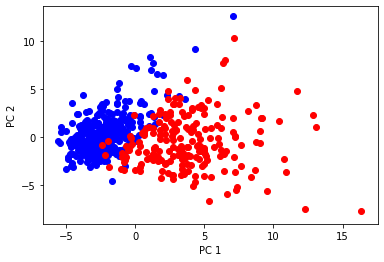

In [16]:
plt.figure()
plt.xlabel("PC 1")
plt.ylabel("PC 2")

targets = ["Benign", "Malignant"]
colors = ["b", "r"]

for target, color in zip(targets, colors):
        indToKeep = label_df == target
        plt.scatter(pca_df.loc[indToKeep, "PC1"],
                    pca_df.loc[indToKeep, "PC2"],
                    c=color)

In [11]:
pca2 = PCA().fit(x) 
evr = pca2.explained_variance_ratio_
print("\n".join("{:2d}\t{:0.4f}".format(*k) for k in enumerate(evr)))

 0	0.4427
 1	0.1897
 2	0.0939
 3	0.0660
 4	0.0550
 5	0.0402
 6	0.0225
 7	0.0159
 8	0.0139
 9	0.0117
10	0.0098
11	0.0087
12	0.0080
13	0.0052
14	0.0031
15	0.0027
16	0.0020
17	0.0018
18	0.0016
19	0.0010
20	0.0010
21	0.0009
22	0.0008
23	0.0006
24	0.0005
25	0.0003
26	0.0002
27	0.0001
28	0.0000
29	0.0000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

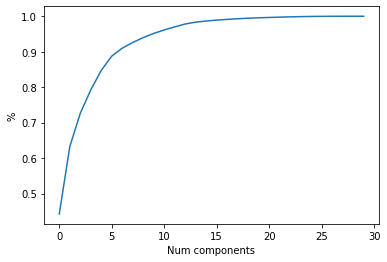

In [12]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("Num components")
plt.ylabel("%")
plt